In [18]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
from sklearn.model_selection import StratifiedKFold, cross_val_score
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, confusion_matrix, accuracy_score as acc, f1_score, recall_score, auc, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold,RepeatedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
# from tabulate import tabulate
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
import statistics
from tqdm import tqdm


In [19]:
#importing our  dataset
df = pd.read_csv('heart.csv')

In [20]:
df

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,1
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,1
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,1
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,1


In [21]:
df.describe()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,2.000000


In [22]:
df.info

<bound method DataFrame.info of      Column1  Column2  Column3  Column4  Column5  Column6  Column7  Column8  \
0         70        1        4      130      322        0        2      109   
1         67        0        3      115      564        0        2      160   
2         57        1        2      124      261        0        0      141   
3         64        1        4      128      263        0        0      105   
4         74        0        2      120      269        0        2      121   
..       ...      ...      ...      ...      ...      ...      ...      ...   
265       52        1        3      172      199        1        0      162   
266       44        1        2      120      263        0        0      173   
267       56        0        2      140      294        0        2      153   
268       57        1        4      140      192        0        0      148   
269       67        1        4      160      286        0        2      108   

     Column9  Colum

In [23]:
from scikitplot.estimators import plot_feature_importances
from scikitplot.metrics import plot_confusion_matrix, plot_roc

In [24]:
from sklearn.model_selection import train_test_split

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
       df.values[:,:-1],
    df.values[:,-1:],
    test_size=0.25,
    random_state=0)

In [25]:
y_train = y_train.ravel()
y_test = y_test.ravel()

print('Training dataset shape:', X_train.shape, y_train.shape)
print('Testing dataset shape:', X_test.shape, y_test.shape)
 

Training dataset shape: (202, 13) (202,)
Testing dataset shape: (68, 13) (68,)


In [26]:
X = df.iloc[:, 0:13]
y = df.iloc[:, 13]

In [27]:
from sklearn.model_selection import train_test_split

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    df.values[:,:-1],
    df.values[:,-1:],
    test_size=0.25,
    random_state=42)

y_train = y_train.ravel()
y_test = y_test.ravel()

print('Training dataset shape:', X_train.shape, y_train.shape)
print('Testing dataset shape:', X_test.shape, y_test.shape)

Training dataset shape: (202, 13) (202,)
Testing dataset shape: (68, 13) (68,)


In [28]:
from sklearn.ensemble import RandomForestClassifier

# Build RF classifier to use in feature selection
clf = RandomForestClassifier(n_estimators=13, n_jobs=-1)

# Build step forward feature selection
sfs1 = sfs(clf,
           k_features=5,
           forward=True,
           floating=False,
           verbose=2,
           scoring='accuracy',
           cv=5)

# Perform SFFS
sfs1 = sfs1.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    1.0s finished

[2022-05-08 14:38:02] Features: 1/5 -- score: 0.7724390243902439[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    1.0s finished

[2022-05-08 14:38:03] Features: 2/5 -- score: 0.7724390243902439[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.8s finished

[2022-05-08 14:38:04] Features: 3/5 -- score: 0.7923170731707316[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [29]:
# Which features?
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[1, 2, 8, 10, 12]


In [30]:

# Build full model with selected features
clf = RandomForestClassifier(n_estimators=1000, random_state=42, max_depth=4)
clf.fit(X_train[:, feat_cols], y_train)

y_train_pred = clf.predict(X_train[:, feat_cols])
print('Training accuracy on selected features: %.3f' % acc(y_train, y_train_pred))

y_test_pred = clf.predict(X_test[:, feat_cols])
print('Testing accuracy on selected features: %.3f' % acc(y_test, y_test_pred))

Training accuracy on selected features: 0.861
Testing accuracy on selected features: 0.779


In [32]:
# Build full model on ALL features, for comparison
clf = RandomForestClassifier(n_estimators=50, random_state=0, max_depth=2)
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
print('Training accuracy on all features: %.3f' % acc(y_train, y_train_pred))

y_test_pred = clf.predict(X_test)
print('Testing accuracy on all features: %.3f' % acc(y_test, y_test_pred))

Training accuracy on all features: 0.861
Testing accuracy on all features: 0.838


In [33]:
X

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6


In [34]:
y

0      2
1      1
2      2
3      1
4      1
      ..
265    1
266    1
267    1
268    1
269    2
Name: Column14, Length: 270, dtype: int64

In [35]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
knn = KNeighborsClassifier(n_neighbors=13)
# Sequential Forward Selection
sfs = SFS(knn, 
          k_features=3, 
          forward=True, 
          floating=False, 
          scoring='accuracy',
          cv=4,
          n_jobs=-1)
sfs = sfs.fit(X, y)

print('\nSequential Forward Selection (k=3):')
print(sfs.k_feature_idx_)
print('CV Score:')
print(sfs.k_score_)


Sequential Forward Selection (k=3):
(2, 11, 12)
CV Score:
0.8332418788410887


In [36]:
#Create the features
nonlr_clf_dict = dict()


LDA_clf = LinearDiscriminantAnalysis()
nonlr_clf_dict['Linear Discriminant Classifier'] = LDA_clf

QDA_clf = QuadraticDiscriminantAnalysis()
nonlr_clf_dict['Quadratic Discriminant Classifier'] = QDA_clf


KNN_clf = KNeighborsClassifier()
nonlr_clf_dict['KNeighborsClassifier'] = KNN_clf


DT_clf = tree.DecisionTreeClassifier()
nonlr_clf_dict['Decision Trees Classifier'] = DT_clf


NB_clf = GaussianNB()
nonlr_clf_dict['Naive Bayes Classifier'] = NB_clf




In [64]:
# defined the function to return specificity ,sensitivity , precision , f1score , auc for each classifier
def evaluate_model(clf, X, y, sfs1):                       
#for clf_name, clf in nonlr_clf_dict.items():
    specificity = list()
    sensitvity = list()
    f1_scores = list()
    auc_scores = list()
    accuracy_scores = list()
    precision_scores = list()  

    specificity_std = list()
    sensitvity_std = list()
    f1_scores_std = list()
    auc_scores_std = list()
    accuracy_scores_std = list()
    precision_scores_std = list()   

    for i in range(0, 13):# features
    # for i in range(0, 3):
        # We generate the set of features
        feat = X.iloc[:,:i+1]
        target = y
        # n_repeats=100
        fold = RepeatedKFold(n_splits=5, n_repeats=2, random_state=10)
        # list for each features
        split_sensi = list()
        split_speci = list()
        split_accu = list()
        split_f1 = list()
        split_precision = list()
        split_auc = list()

        #for n in range(100):
        for train_index, test_index in fold.split(X,y):
            X_train= feat.iloc[train_index,:]
            X_test = feat.iloc[test_index,:]
            y_train = target.iloc[train_index]
            y_test= target.iloc[test_index]
                
                    
            # Fitting the classifier 
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            # We have confusion matrx
            cm = confusion_matrix(y_test,y_pred)
            tn, fp, fn, tp = cm.ravel()

            # Calucating metrics for each iteration
            split_sensi.append(tp / (tp+fn))
            split_speci.append(tn / (tn+fp))
            
            # Calculating accuracy
            split_accu.append(accuracy_score(y_test, y_pred))

            # Calculating auc_scores
            split_auc.append(roc_auc_score(y_test, y_pred))

            # Calculating f1 scores
            split_f1.append(f1_score(y_test, y_pred))

            # Calculating precision
            split_precision.append((tp / (tp + fp)) )
                
         
         # After competing all folds, appending the average of metrics to the main matric list
         # mean = sum(list)/len(list)
        sensitvity.append(sum(split_sensi) / len(split_sensi))
        specificity.append(sum(split_speci) / len(split_sensi))
        precision_scores.append(sum(split_precision) / len(split_sensi))
        auc_scores.append(sum(split_auc) / len(split_sensi))
        accuracy_scores.append(sum(split_accu) / len(split_sensi))
        f1_scores.append(sum(split_f1) / len(split_sensi))
       
        sensitvity_std.append(statistics.stdev(split_sensi))
        specificity_std.append(statistics.stdev(split_speci))
        precision_scores_std.append(statistics.stdev(split_precision))
        auc_scores_std.append(statistics.stdev(split_auc))
        accuracy_scores_std.append(statistics.stdev(split_accu))
        f1_scores_std.append(statistics.stdev(split_f1))

       
    print("")
    #print("Classifier :",  clf_name)

    print("specificity :",  specificity)
    print("sensitvity :", sensitvity)
    print("f1_scores :",f1_scores)
    print("auc_scores :", auc_scores)
    print("accuracy_scores :", accuracy_scores)
    print("precision_scores :", precision_scores)
    print("")
    print("sensitvity_std :",  sensitvity_std)
    print("specificity_std :", specificity_std)
    print("precision_scores_std :",precision_scores_std)
    print("auc_scores_std :", auc_scores_std)
    print("accuracy_scores_std :", accuracy_scores_std)
    print("f1_scores_std :", f1_scores_std)
    return {
    "specificity" : specificity,
    "sensitvity" : sensitvity,
    "f1_scores" : f1_scores,
    "auc_scores" : auc_scores,
    "accuracy_scores" : accuracy_scores,
    "precision_scores" : precision_scores,
    }    



In [65]:
#Create the features for graphs
NB_clf =GaussianNB()
DT_clf = tree.DecisionTreeClassifier()
KNN_clf =KNeighborsClassifier()
LDA_clf = LinearDiscriminantAnalysis()
QDA_clf= QuadraticDiscriminantAnalysis()

In [66]:
df.columns

Index(['number_of_features', 'Precision_score'], dtype='object')

# **Naive Bayes**

Implementation

In [67]:
# Evaluating the Classifier
print("Classifier : Naive Bayes")
#for i in tqdm(range(45)):
gaussianScores = evaluate_model(NB_clf, X, y, sfs1)
print(gaussianScores)

Classifier : Naive Bayes

specificity : [0.6382260809680164, 0.6319379097604905, 0.7205064648613037, 0.7475612798193444, 0.727639803446255, 0.7442944451008968, 0.7512162867001576, 0.7712035127357708, 0.8295237468624566, 0.841239211803728, 0.8043124587479425, 0.8537029428158462, 0.8668694656597882]
sensitvity : [0.554690237298933, 0.7032736104475236, 0.6911562350692785, 0.7105926279839323, 0.690152094282529, 0.6774231565535913, 0.6873874997788041, 0.6705007874573092, 0.6778927111535807, 0.7455495390277999, 0.7323016757799367, 0.790864168038081, 0.8071167560297994]
f1_scores : [0.6289077032754051, 0.6724722789304045, 0.7314392844070813, 0.7533784762578374, 0.7330308520447231, 0.7404702310200317, 0.7466588526259729, 0.7551558403375742, 0.7913311114384867, 0.8193559543479181, 0.7951112663204488, 0.842634208659556, 0.8572592878195232]
auc_scores : [0.5964581591334748, 0.667605760104007, 0.7058313499652911, 0.7290769539016383, 0.7088959488643922, 0.710858800827244, 0.719301893239481, 0.72085

In [68]:
# For maximum values for each classifiers
maxValues = list()

In [69]:
# Getting index for the maximum values
maxIndex = np.argmax(np.array(gaussianScores['accuracy_scores']))

maxValues.append(["Naive Bayes", 
maxIndex,
gaussianScores["accuracy_scores"][maxIndex], 
gaussianScores["specificity"][maxIndex],
gaussianScores["sensitvity"][maxIndex],
gaussianScores["f1_scores"][maxIndex],
gaussianScores["auc_scores"][maxIndex],
gaussianScores["precision_scores"][maxIndex],
])

In [70]:
# For maximum values for each classifiers
maxValues = list()
print("Maximum feature of Naive Bayes Classifier : ", maxIndex)

Maximum feature of Naive Bayes Classifier :  12


**Metrics for Naive Bayes Classifier**

In [71]:
print(np.array(gaussianScores['accuracy_scores']))

[0.59259259 0.66296296 0.70740741 0.72962963 0.70925926 0.71296296
 0.72037037 0.72592593 0.76296296 0.79814815 0.77222222 0.82592593
 0.84259259]


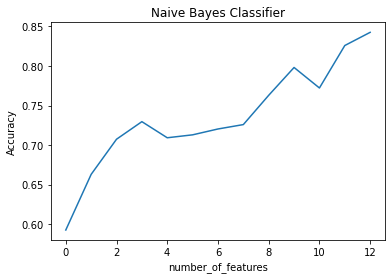

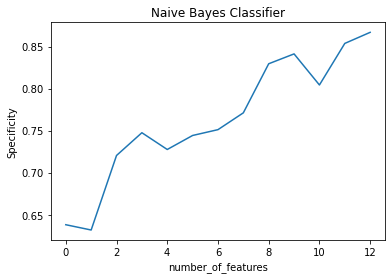

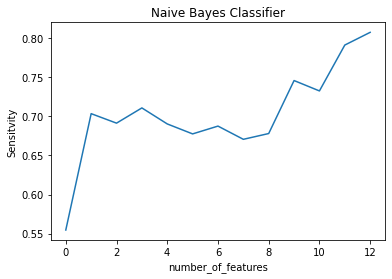

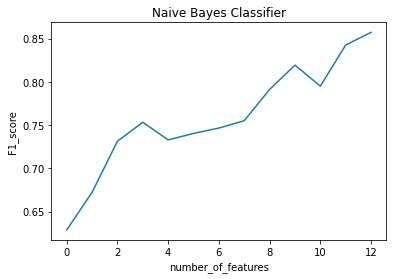

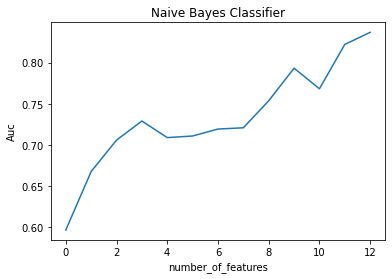

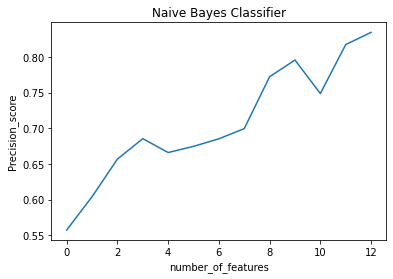

In [72]:
# Plotting number of features vs the metrics

# number of features vs accuracy
df = pd.DataFrame({"number_of_features" : np.array(range(0,13)),
"Accuracy": np.array(gaussianScores['accuracy_scores'])})
sns.lineplot(x='number_of_features', y='Accuracy', data=df)
plt.title('Naive Bayes Classifier')
plt.show()

# number of features vs specificity
df = pd.DataFrame({"number_of_features" : np.array(range(0,13)),
"Specificity": np.array(gaussianScores['specificity'])})
sns.lineplot(x='number_of_features', y='Specificity', data=df)
plt.title('Naive Bayes Classifier')
plt.show()

# number of features vs sensitvity
df = pd.DataFrame({"number_of_features" : np.array(range(0,13)),
"Sensitvity": np.array(gaussianScores['sensitvity'])})
sns.lineplot(x='number_of_features', y='Sensitvity', data=df)
plt.title('Naive Bayes Classifier')
plt.show()

# number of features vs f1_scores
df = pd.DataFrame({"number_of_features" : np.array(range(0,13)),
"F1_score": np.array(gaussianScores['f1_scores'])})
sns.lineplot(x='number_of_features', y='F1_score', data=df)
plt.title('Naive Bayes Classifier')
plt.show()

# number of features vs auc
df = pd.DataFrame({"number_of_features" : np.array(range(0,13)),
"Auc": np.array(gaussianScores['auc_scores'])})
sns.lineplot(x='number_of_features', y='Auc', data=df)
plt.title('Naive Bayes Classifier')
plt.show()

# number of features vs precision
df = pd.DataFrame({"number_of_features" : np.array(range(0,13)),
"Precision_score": np.array(gaussianScores['precision_scores'])})
sns.lineplot(x='number_of_features', y='Precision_score', data=df)
plt.title('Naive Bayes Classifier')
plt.show()


# **Decision Tree**

Implementation

In [74]:
# Evaluating the Classifier
print("Classifier : Decision Trees Classifier")
DTScores = evaluate_model(DT_clf, X, y,sfs1)
print(DTScores)


Classifier : Decision Trees Classifier

specificity : [0.697250971847746, 0.6588769653285783, 0.738901092933351, 0.7181327185359444, 0.7235955800471928, 0.710186363815396, 0.7175538768280704, 0.6827424516940647, 0.7004428665718988, 0.7343366161914548, 0.7242229843036294, 0.7791371113951759, 0.7488228617260876]
sensitvity : [0.41920847268673356, 0.47325326042717347, 0.5914293677337155, 0.6312486064659978, 0.691762400240661, 0.6701741253915167, 0.6654436304436303, 0.6612535612535613, 0.6448361380970076, 0.6488157172939782, 0.6592104192104191, 0.7405305161826902, 0.71049662897489]
f1_scores : [0.6401347414887422, 0.6316285052763688, 0.7099074036866908, 0.7083430464476261, 0.7281635251818999, 0.7116799223902947, 0.7157732051977576, 0.6897622552382467, 0.7001049444033506, 0.7263684701983945, 0.7211073674782936, 0.7783153703055085, 0.7543124080564099]
auc_scores : [0.5582297222672399, 0.5660651128778758, 0.6651652303335333, 0.6746906625009711, 0.707678990143927, 0.6901802446034565, 0.6914987

**Metrics for Decision Trees Classifier**

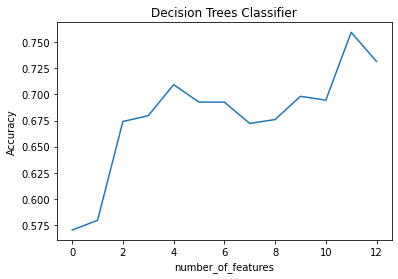

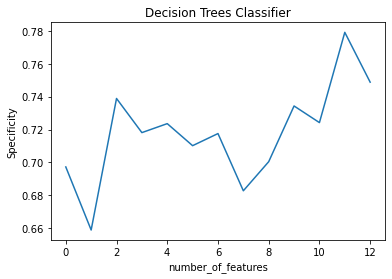

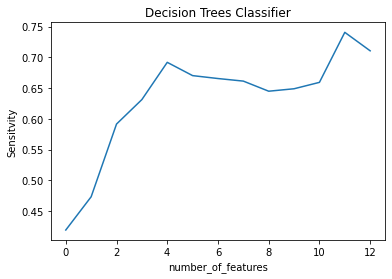

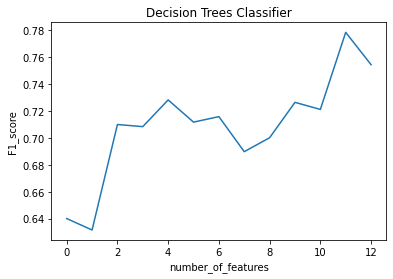

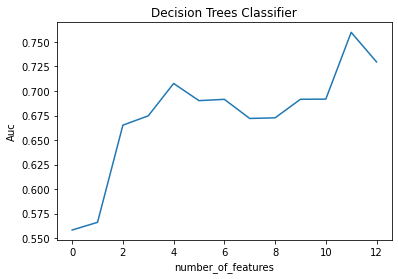

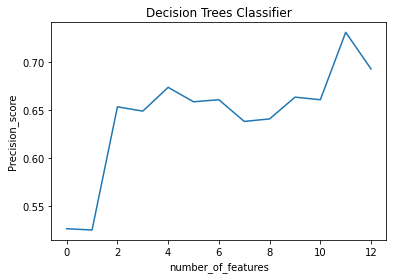

In [75]:
# Plotting number of features vs the metrics

# number of features vs accuracy
df = pd.DataFrame({"number_of_features" : np.array(range(0,13)),
"Accuracy": np.array(DTScores['accuracy_scores'])})
sns.lineplot(x='number_of_features', y='Accuracy', data=df)
plt.title('Decision Trees Classifier')
plt.show()

# number of features vs specificity
df = pd.DataFrame({"number_of_features" : np.array(range(0,13)),
"Specificity": np.array(DTScores['specificity'])})
sns.lineplot(x='number_of_features', y='Specificity', data=df)
plt.title('Decision Trees Classifier')
plt.show()

# number of features vs sensitvity
df = pd.DataFrame({"number_of_features" : np.array(range(0,13)),
"Sensitvity": np.array(DTScores['sensitvity'])})
sns.lineplot(x='number_of_features', y='Sensitvity', data=df)
plt.title('Decision Trees Classifier')
plt.show()

# number of features vs f1_scores
df = pd.DataFrame({"number_of_features" : np.array(range(0,13)),
"F1_score": np.array(DTScores['f1_scores'])})
sns.lineplot(x='number_of_features', y='F1_score', data=df)
plt.title('Decision Trees Classifier')
plt.show()

# number of features vs auc
df = pd.DataFrame({"number_of_features" : np.array(range(0,13)),
"Auc": np.array(DTScores['auc_scores'])})
sns.lineplot(x='number_of_features', y='Auc', data=df)
plt.title('Decision Trees Classifier')
plt.show()

# number of features vs precision
df = pd.DataFrame({"number_of_features" : np.array(range(0,13)),
"Precision_score": np.array(DTScores['precision_scores'])})
sns.lineplot(x='number_of_features', y='Precision_score', data=df)
plt.title('Decision Trees Classifier')
plt.show()

In [76]:
# Getting index for the maximum values
maxIndex = np.argmax(np.array(DTScores['accuracy_scores']))

maxValues.append(["Decision Trees", 
maxIndex,
DTScores["accuracy_scores"][maxIndex], 
DTScores["specificity"][maxIndex],
DTScores["sensitvity"][maxIndex],
DTScores["f1_scores"][maxIndex],
DTScores["auc_scores"][maxIndex],
DTScores["precision_scores"][maxIndex],
])

In [77]:
# For maximum values for each classifiers
maxValues = list()
print('Maximum value feature of Decision Trees Classifier : ',maxIndex)

Maximum value feature of Decision Trees Classifier :  11


# **K-Nearest Neighbor **
Implementation

In [78]:
print('KNearestclassifier')
RFScores = evaluate_model(KNN_clf, X, y,sfs1)
print(RFScores)

KNearestclassifier

specificity : [0.5981872070581749, 0.6263798477508153, 0.6447447415189351, 0.6413446469898083, 0.6168018063179354, 0.6168018063179354, 0.6135759998663224, 0.7248203409493732, 0.7248203409493732, 0.7283917695208018, 0.7283917695208018, 0.7325584361874685, 0.7293326297358556]
sensitvity : [0.5009393746350267, 0.5697084638388986, 0.671003256003256, 0.5292812903682469, 0.5283714675019022, 0.5283714675019022, 0.5356465997770345, 0.5319430730300296, 0.5319430730300296, 0.5275952469430731, 0.5275952469430731, 0.54013705296314, 0.5439832068092938]
f1_scores : [0.5943490282626008, 0.6343254532865663, 0.6734797535046804, 0.6279126099722917, 0.6104016870428692, 0.6104016870428692, 0.6101989724297898, 0.6845699902162141, 0.6845699902162141, 0.6857716582819754, 0.6857716582819754, 0.6912839440404766, 0.690302964637366]
auc_scores : [0.5495632908466008, 0.5980441557948571, 0.6578739987610955, 0.5853129686790275, 0.5725866369099187, 0.5725866369099187, 0.5746112998216785, 0.628381

**Metrics K-Nearest Neighbor**

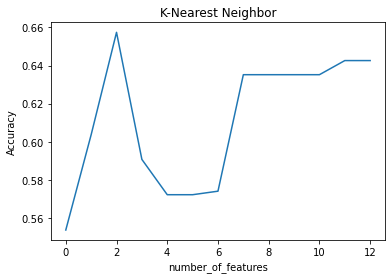

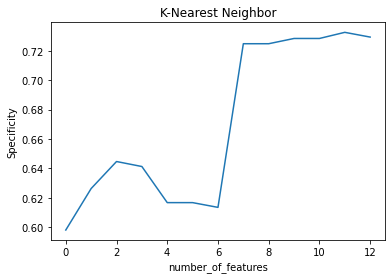

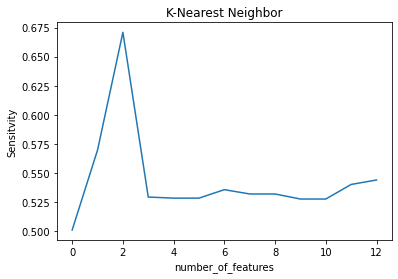

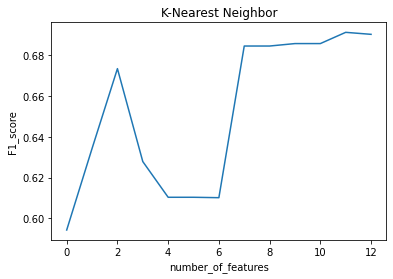

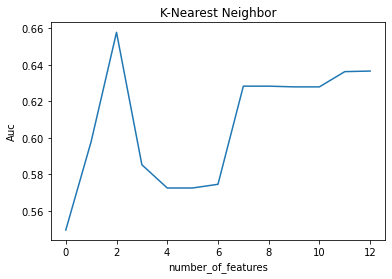

<AxesSubplot:xlabel='number_of_features', ylabel='Precision_score'>

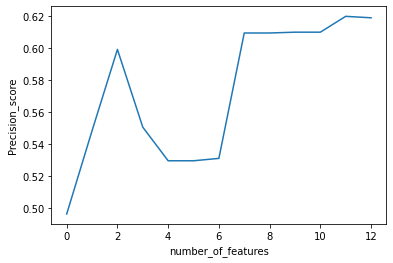

In [79]:
# Plotting number of features vs the metrics

# number of features vs accuracy
df = pd.DataFrame({"number_of_features" : np.array(range(0,13)),
"Accuracy": np.array(RFScores['accuracy_scores'])})
sns.lineplot(x='number_of_features', y='Accuracy', data=df)
plt.title('K-Nearest Neighbor')
plt.show()

# number of features vs specificity
df = pd.DataFrame({"number_of_features" : np.array(range(0,13)),
"Specificity": np.array(RFScores['specificity'])})
sns.lineplot(x='number_of_features', y='Specificity', data=df)
plt.title('K-Nearest Neighbor')
plt.show()

# number of features vs sensitvity
df = pd.DataFrame({"number_of_features" : np.array(range(0,13)),
"Sensitvity": np.array(RFScores['sensitvity'])})
sns.lineplot(x='number_of_features', y='Sensitvity', data=df)
plt.title('K-Nearest Neighbor')
plt.show()

# number of features vs f1_scores
df = pd.DataFrame({"number_of_features" : np.array(range(0,13)),
"F1_score": np.array(RFScores['f1_scores'])})
sns.lineplot(x='number_of_features', y='F1_score', data=df)
plt.title('K-Nearest Neighbor')
plt.show()

# number of features vs auc
df = pd.DataFrame({"number_of_features" : np.array(range(0,13)),
"Auc": np.array(RFScores['auc_scores'])})
sns.lineplot(x='number_of_features', y='Auc', data=df)
plt.title('K-Nearest Neighbor')
plt.show()

# number of features vs precision
df = pd.DataFrame({"number_of_features" : np.array(range(0,13)),
"Precision_score": np.array(RFScores['precision_scores'])})
sns.lineplot(x='number_of_features', y='Precision_score', data=df)

In [80]:
# Getting index for the maximum values
maxIndex = np.argmax(np.array(RFScores['accuracy_scores']))

maxValues.append(["K-Nearest Neighbor", 
maxIndex,
RFScores["accuracy_scores"][maxIndex], 
RFScores["specificity"][maxIndex],
RFScores["sensitvity"][maxIndex],
RFScores["f1_scores"][maxIndex],
RFScores["auc_scores"][maxIndex],
RFScores["precision_scores"][maxIndex],
])

In [81]:
# For maximum values for each classifiers
maxValues = list()
print('Maximum value feature of K-Nearest Neighbor', maxIndex)

Maximum value feature of K-Nearest Neighbor 2


# **Linear Discriminant Classifier**

Implementation

In [82]:
# Evaluating the Classifier
print('Linear Discriminant Classifier')
LDAScores = evaluate_model(LDA_clf, X, y,sfs1)
print(LDAScores)


Linear Discriminant Classifier

specificity : [0.7532743093226965, 0.6706638642122513, 0.7489501687082332, 0.7615946628043402, 0.7602907397262235, 0.7570079114433953, 0.7329921124275963, 0.7998624135720911, 0.8461234106395397, 0.8350000805645967, 0.8248756172143269, 0.8924010726430082, 0.8786985714405068]
sensitvity : [0.3994507264072481, 0.6271022455805063, 0.6954062925802056, 0.7855245881332837, 0.7530540956627914, 0.7566326025021677, 0.774163083293518, 0.720448850666242, 0.6764102564102564, 0.7047100564491868, 0.7143753428536036, 0.7705955477694608, 0.7958367397497833]
f1_scores : [0.6656051587301588, 0.6755408653254669, 0.7482153423032888, 0.7849345020109887, 0.7727198970673851, 0.7714386294167835, 0.7610710010419554, 0.7878140328999269, 0.8022792327353875, 0.8037140245863241, 0.8009499886459995, 0.8579615134623764, 0.8591951217715721]
auc_scores : [0.5763625178649723, 0.6488830548963789, 0.7221782306442195, 0.7735596254688121, 0.7566724176945075, 0.7568202569727815, 0.753577597860

**Metrics for Linear Discriminant Classifier**

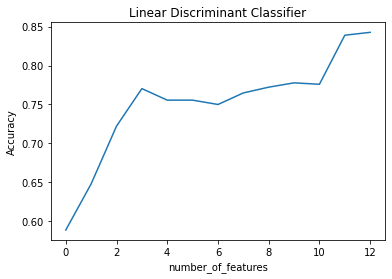

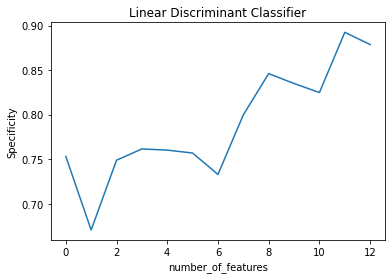

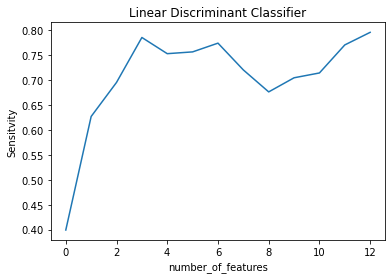

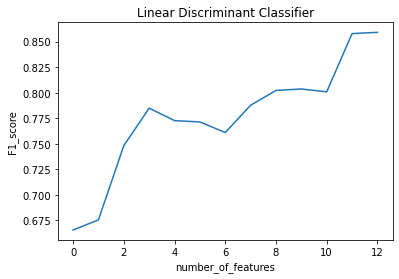

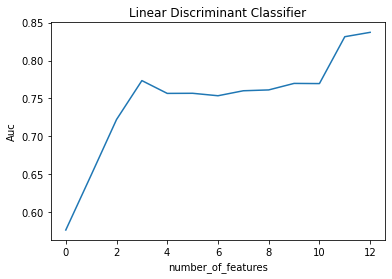

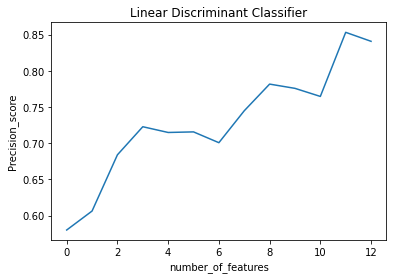

In [83]:
# Plotting number of features vs the metrics

# number of features vs accuracy
df = pd.DataFrame({"number_of_features" : np.array(range(0,13)),
"Accuracy": np.array(LDAScores['accuracy_scores'])})
sns.lineplot(x='number_of_features', y='Accuracy', data=df)
plt.title('Linear Discriminant Classifier')
plt.show()

# number of features vs specificity
df = pd.DataFrame({"number_of_features" : np.array(range(0,13)),
"Specificity": np.array(LDAScores['specificity'])})
sns.lineplot(x='number_of_features', y='Specificity', data=df)
plt.title('Linear Discriminant Classifier')
plt.show()

# number of features vs sensitvity
df = pd.DataFrame({"number_of_features" : np.array(range(0,13)),
"Sensitvity": np.array(LDAScores['sensitvity'])})
sns.lineplot(x='number_of_features', y='Sensitvity', data=df)
plt.title('Linear Discriminant Classifier')
plt.show()

# number of features vs f1_scores
df = pd.DataFrame({"number_of_features" : np.array(range(0,13)),
"F1_score": np.array(LDAScores['f1_scores'])})
sns.lineplot(x='number_of_features', y='F1_score', data=df)
plt.title('Linear Discriminant Classifier')
plt.show()

# number of features vs auc
df = pd.DataFrame({"number_of_features" : np.array(range(0,13)),
"Auc": np.array(LDAScores['auc_scores'])})
sns.lineplot(x='number_of_features', y='Auc', data=df)
plt.title('Linear Discriminant Classifier')
plt.show()

# number of features vs precision
df = pd.DataFrame({"number_of_features" : np.array(range(0,13)),
"Precision_score": np.array(LDAScores['precision_scores'])})
sns.lineplot(x='number_of_features', y='Precision_score', data=df)
plt.title('Linear Discriminant Classifier')
plt.show()

In [84]:
# Getting index for the maximum values
maxIndex = np.argmax(np.array(LDAScores['accuracy_scores']))

maxValues.append(["LDA", 
maxIndex,
LDAScores["accuracy_scores"][maxIndex], 
LDAScores["specificity"][maxIndex],
LDAScores["sensitvity"][maxIndex],
LDAScores["f1_scores"][maxIndex],
LDAScores["auc_scores"][maxIndex],
LDAScores["precision_scores"][maxIndex],
])

In [85]:
# For maximum values for each classifiers
maxValues = list()
print('Maximum value feature of Linear Discriminant Classifier: ',maxIndex)

Maximum value feature of Linear Discriminant Classifier:  12


# **Quadratic Discriminant Classifier**
Implementation

In [87]:
# Evaluating the Classifier
print('Quadratic Discriminant Classifier')
QDAScores = evaluate_model(QDA_clf, X, y,sfs1)
print(QDAScores)

Quadratic Discriminant Classifier

specificity : [0.6382260809680164, 0.6414496942722749, 0.7203109614399937, 0.727499203305655, 0.7135441768506284, 0.7194242137790525, 0.7190095448159964, 0.7599321079159789, 0.7977702554315458, 0.8132043583656486, 0.8173107060203835, 0.8537348553477585, 0.8498130453775616]
sensitvity : [0.5590380633858895, 0.6906810178549309, 0.7042718231848666, 0.75676797437667, 0.7242363433667782, 0.6924302348215392, 0.6843695032825468, 0.6801304170869389, 0.7049238201412115, 0.7064449399232008, 0.7221684273858187, 0.7524403213533648, 0.791620215533259]
f1_scores : [0.6298366650240389, 0.6752936945387474, 0.7352882179453591, 0.7547860427646225, 0.7358704377625702, 0.7312532585268421, 0.7263682897765718, 0.7516085287107452, 0.7819847071590527, 0.7914079666650069, 0.798634917133412, 0.8317315130724147, 0.8414562209063231]
auc_scores : [0.5986320721769529, 0.666065356063603, 0.7122913923124302, 0.7421335888411625, 0.7188902601087033, 0.7059272243002959, 0.7016895240492

**Metrics for Quadratic Discriminant Classifier**

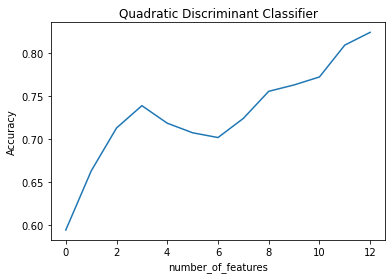

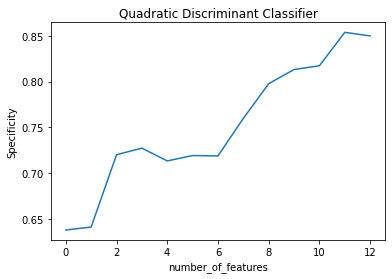

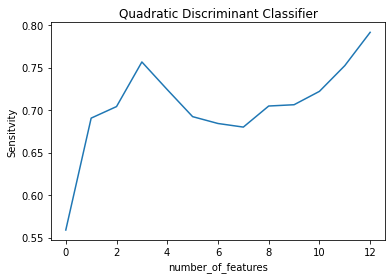

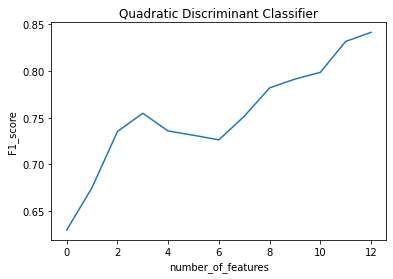

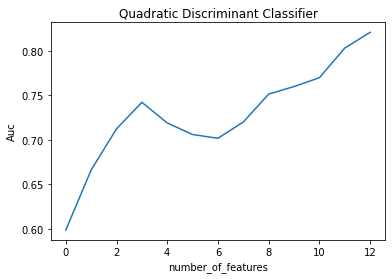

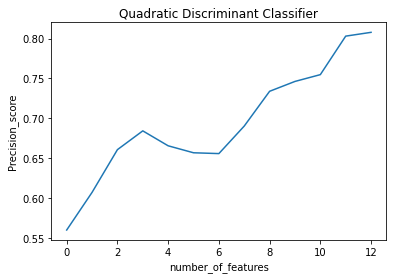

In [88]:
# Plotting number of features vs the metrics

# number of features vs accuracy
df = pd.DataFrame({"number_of_features" : np.array(range(0,13)),
"Accuracy": np.array(QDAScores['accuracy_scores'])})
sns.lineplot(x='number_of_features', y='Accuracy', data=df)
plt.title('Quadratic Discriminant Classifier')
plt.show()

# number of features vs specificity
df = pd.DataFrame({"number_of_features" : np.array(range(0,13)),
"Specificity": np.array(QDAScores['specificity'])})
sns.lineplot(x='number_of_features', y='Specificity', data=df)
plt.title('Quadratic Discriminant Classifier')
plt.show()

# number of features vs sensitvity
df = pd.DataFrame({"number_of_features" : np.array(range(0,13)),
"Sensitvity": np.array(QDAScores['sensitvity'])})
sns.lineplot(x='number_of_features', y='Sensitvity', data=df)
plt.title('Quadratic Discriminant Classifier')
plt.show()

# number of features vs f1_scores
df = pd.DataFrame({"number_of_features" : np.array(range(0,13)),
"F1_score": np.array(QDAScores['f1_scores'])})
sns.lineplot(x='number_of_features', y='F1_score', data=df)
plt.title('Quadratic Discriminant Classifier')
plt.show()

# number of features vs auc
df = pd.DataFrame({"number_of_features" : np.array(range(0,13)),
"Auc": np.array(QDAScores['auc_scores'])})
sns.lineplot(x='number_of_features', y='Auc', data=df)
plt.title('Quadratic Discriminant Classifier')
plt.show()

# number of features vs precision
df = pd.DataFrame({"number_of_features" : np.array(range(0,13)),
"Precision_score": np.array(QDAScores['precision_scores'])})
sns.lineplot(x='number_of_features', y='Precision_score', data=df)
plt.title('Quadratic Discriminant Classifier')
plt.show()

In [89]:
# Getting index for the maximum values
maxIndex = np.argmax(np.array(QDAScores['accuracy_scores']))

maxValues.append(["QDE", 
maxIndex,
QDAScores["accuracy_scores"][maxIndex], 
QDAScores["specificity"][maxIndex],
QDAScores["sensitvity"][maxIndex],
QDAScores["f1_scores"][maxIndex],
QDAScores["auc_scores"][maxIndex],
QDAScores["precision_scores"][maxIndex],
])

In [90]:
# For maximum values for each classifiers
maxValues = list()
print('Quadratic Discriminant Classifier: ',maxIndex)

Quadratic Discriminant Classifier:  12


# **mean ± standard deviation**

In [91]:
import warnings
warnings.filterwarnings('ignore')

In [92]:
for i in tqdm(range(1)):  
  for clf_name, clf in nonlr_clf_dict.items():
    specificity = list()
    sensitvity = list()
    f1_scores = list()
    auc_scores = list()
    accuracy_scores = list()
    precision_scores = list()  

    specificity_std = list()
    sensitvity_std = list()
    f1_scores_std = list()
    auc_scores_std = list()
    accuracy_scores_std = list()
    precision_scores_std = list()   

    for i in range(0, 13):# features
        # We generate the set of features
      feat = X.iloc[:,:i+1]
      target = y
      # n_repeats=100
      fold = RepeatedKFold(n_splits=5, n_repeats=100, random_state=0)
      # list for each features
      split_sensi = list()
      split_speci = list()
      split_accu = list()
      split_f1 = list()
      split_precision = list()
      split_auc = list()

      #for n in range(100):
      for train_index, test_index in fold.split(feat):# train_index, test_index in skf.split():

        X_train= feat.iloc[train_index,:]
        X_test = feat.iloc[test_index,:]
        y_train = target.iloc[train_index]
        y_test= target.iloc[test_index]
                    
              
        # Fitting the classifier 
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        # We have confusion matrx
        cm = confusion_matrix(y_test,y_pred)
        tn, fp, fn, tp = cm.ravel()

        # Calucating metrics for each iteration
        split_sensi.append(tp / (tp+fn))
        split_speci.append(tn / (tn+fp))
                
        # Calculating accuracy
        split_accu.append(accuracy_score(y_test, y_pred))

        # Calculating auc_scores
        split_auc.append(roc_auc_score(y_test, y_pred))

        # Calculating f1 scores
        split_f1.append(f1_score(y_test, y_pred))

        # Calculating precision
        split_precision.append((tp / (tp + fp)) )
                    

    # After competing all folds, appending the average of metrics to the main matric list
    print("")
    print("Classifier :",  clf_name)
    sensitvity.append(sum(split_sensi) / len(split_sensi))
    specificity.append(sum(split_speci) / len(split_sensi))
    precision_scores.append(sum(split_precision) / len(split_sensi))
    auc_scores.append(sum(split_auc) / len(split_sensi))
    accuracy_scores.append(sum(split_accu) / len(split_sensi))
    f1_scores.append(sum(split_f1) / len(split_sensi))
    # st dev --> import statistics, statistics.pstdev(list)
    sensitvity_std.append(statistics.stdev(split_sensi))
    specificity_std.append(statistics.stdev(split_speci))
    precision_scores_std.append(statistics.stdev(split_precision))
    auc_scores_std.append(statistics.stdev(split_auc))
    accuracy_scores_std.append(statistics.stdev(split_accu))
    f1_scores_std.append(statistics.stdev(split_f1))



    print("specificity :",  specificity)
    print("sensitvity :", sensitvity)
    print("f1_scores :",f1_scores)
    print("auc_scores :", auc_scores)
    print("accuracy_scores :", accuracy_scores)
    #print("precision_scores :", precision_scores)

    print("accuracy_scores :", accuracy_scores,'+/-',accuracy_scores_std)
    print("specificity :",  specificity,'+/-',specificity_std)
    print("sensitvity :", sensitvity,'+/-',sensitvity_std)
    print("f1_scores :",f1_scores,'+/-',f1_scores_std)
    print("auc_scores :", auc_scores,'+/-',auc_scores_std)

    #print("precision_scores :", precision_scores,'+/-',precision_scores_std)
    #print("")
    #print("sensitvity_std :",  sensitvity_std)
    #print("specificity_std :", specificity_std)
    #print("precision_scores_std :",precision_scores_std)
    #print("auc_scores_std :", auc_scores_std)

    #print("accuracy_scores_std :", accuracy_scores_std)
    #print("f1_scores_std :", f1_scores_std)


  0%|          | 0/1 [00:00<?, ?it/s]


Classifier : Linear Discriminant Classifier
specificity : [0.8812462283538881]
sensitvity : [0.7882177774055763]
f1_scores : [0.8571831957003339]
auc_scores : [0.8347320028797319]
accuracy_scores : [0.8396296296296307]
accuracy_scores : [0.8396296296296307] +/- [0.045694522887502996]
specificity : [0.8812462283538881] +/- [0.05890680452686011]
sensitvity : [0.7882177774055763] +/- [0.07200172471277283]
f1_scores : [0.8571831957003339] +/- [0.045549786289501494]
auc_scores : [0.8347320028797319] +/- [0.04602045070808833]

Classifier : Quadratic Discriminant Classifier
specificity : [0.8448158293850793]
sensitvity : [0.7881166609942315]
f1_scores : [0.83599474317884]
auc_scores : [0.8164662451896546]
accuracy_scores : [0.8188148148148154]
accuracy_scores : [0.8188148148148154] +/- [0.047800272262331335]
specificity : [0.8448158293850793] +/- [0.06560769050148109]
sensitvity : [0.7881166609942315] +/- [0.07645477297941411]
f1_scores : [0.83599474317884] +/- [0.04816792027160985]
auc_scor

100%|██████████| 1/1 [01:45<00:00, 105.01s/it]


Classifier : Naive Bayes Classifier
specificity : [0.8680338926600734]
sensitvity : [0.8089799510945351]
f1_scores : [0.8566389887036283]
auc_scores : [0.8385069218773034]
accuracy_scores : [0.8414814814814829]
accuracy_scores : [0.8414814814814829] +/- [0.046433034911610174]
specificity : [0.8680338926600734] +/- [0.06259440455636485]
sensitvity : [0.8089799510945351] +/- [0.07424748213562972]
f1_scores : [0.8566389887036283] +/- [0.04722852748480066]
auc_scores : [0.8385069218773034] +/- [0.046995953316577514]
